In [ ]:
from google.colab import files
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

uploaded = files.upload()
df = pd.read_csv("datathon_clean.csv")

Saving datathon_clean.csv to datathon_clean (2).csv


In [ ]:
df.dtypes

DATE_FDA_FIRST_RECEIVED_REPORT     object
REPORT_ID                          object
DATE_EVENT                         object
PRODUCT_TYPE                       object
PRODUCT                            object
PRODUCT_CODE                       object
DESCRIPTION                        object
PATIENT_AGE                       float64
AGE_UNITS                          object
SEX                                object
CASE_MEDDRA_PREFERRED_TERMS        object
CASE_OUTCOME                       object
YEARS                             float64
dtype: object

In [ ]:
len(df)

90211

In [ ]:
df.head()

,DATE_FDA_FIRST_RECEIVED_REPORT,REPORT_ID,DATE_EVENT,PRODUCT_TYPE,PRODUCT,PRODUCT_CODE,DESCRIPTION,PATIENT_AGE,AGE_UNITS,SEX,CASE_MEDDRA_PREFERRED_TERMS,CASE_OUTCOME,YEARS
0,6/30/2023,2023-CFS-006722,6/27/2023,SUSPECT,AIRLINE FOOD SERVED BY UNITED AIRLINES,37,Mult Food Dinner/Grav/Sauce/Special,45.0,year(s),Male,"Diarrhoea, Food poisoning, Pyrexia, Tremor, Vo...",Other Serious or Important Medical Event,45.0
1,6/30/2023,2023-CFS-006712,6/25/2023,SUSPECT,COKE ZERO,29,Soft Drink/Water,65.0,year(s),Male,"Disorientation, Fatigue, Seizure","Life Threatening, Hospitalization, Other Serio...",65.0
2,6/29/2023,2023-CFS-006687,6/20/2023,SUSPECT,HUEL BLACK EDITION,37,Mult Food Dinner/Grav/Sauce/Special,39.0,year(s),Male,Food poisoning,Other Serious or Important Medical Event,39.0
3,6/29/2023,2023-CFS-006682,6/27/2023,SUSPECT,GINKGO BILOBA,54,Vit/Min/Prot/Unconv Diet(Human/Animal),92.0,year(s),Female,"Cardiac failure, Death, Hypoglycaemia, Renal f...","Death, Hospitalization",92.0
4,6/29/2023,2023-CFS-006676,6/27/2023,SUSPECT,WATERMELON,20,Fruit/Fruit Prod,73.0,year(s),Female,"Diarrhoea, Vomiting",Other Serious or Important Medical Event,73.0


In [ ]:
event_type = df["CASE_OUTCOME"].str.split(', ').explode()
event_type = event_type.str.strip()

#new df with event type
new_df = pd.DataFrame({'event_type': event_type})

#merge new df with orig df
df = pd.concat([df, new_df], axis=1)

df.head()

,DATE_FDA_FIRST_RECEIVED_REPORT,REPORT_ID,DATE_EVENT,PRODUCT_TYPE,PRODUCT,PRODUCT_CODE,DESCRIPTION,PATIENT_AGE,AGE_UNITS,SEX,CASE_MEDDRA_PREFERRED_TERMS,CASE_OUTCOME,YEARS,event_type
0,6/30/2023,2023-CFS-006722,6/27/2023,SUSPECT,AIRLINE FOOD SERVED BY UNITED AIRLINES,37,Mult Food Dinner/Grav/Sauce/Special,45.0,year(s),Male,"Diarrhoea, Food poisoning, Pyrexia, Tremor, Vo...",Other Serious or Important Medical Event,45.0,Other Serious or Important Medical Event
1,6/30/2023,2023-CFS-006712,6/25/2023,SUSPECT,COKE ZERO,29,Soft Drink/Water,65.0,year(s),Male,"Disorientation, Fatigue, Seizure","Life Threatening, Hospitalization, Other Serio...",65.0,Life Threatening
1,6/30/2023,2023-CFS-006712,6/25/2023,SUSPECT,COKE ZERO,29,Soft Drink/Water,65.0,year(s),Male,"Disorientation, Fatigue, Seizure","Life Threatening, Hospitalization, Other Serio...",65.0,Hospitalization
1,6/30/2023,2023-CFS-006712,6/25/2023,SUSPECT,COKE ZERO,29,Soft Drink/Water,65.0,year(s),Male,"Disorientation, Fatigue, Seizure","Life Threatening, Hospitalization, Other Serio...",65.0,Other Serious or Important Medical Event
2,6/29/2023,2023-CFS-006687,6/20/2023,SUSPECT,HUEL BLACK EDITION,37,Mult Food Dinner/Grav/Sauce/Special,39.0,year(s),Male,Food poisoning,Other Serious or Important Medical Event,39.0,Other Serious or Important Medical Event


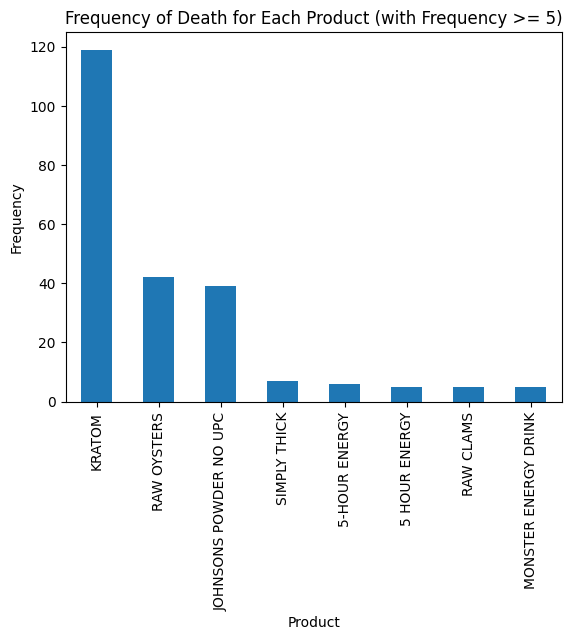

In [ ]:
#remove rows with "Exemption 4" as a product
df_filtered = df[df['PRODUCT'] != 'EXEMPTION 4']

#find rows with "event_type" containing the string "death"
death_events = df_filtered[df_filtered['event_type'].str.contains('Death')]
death_counts = death_events['PRODUCT'].value_counts()
filtered_products = death_counts[death_counts >= 5]

filtered_products.plot(kind='bar')
plt.xlabel('Product')
plt.ylabel('Frequency')
plt.title('Frequency of Death for Each Product (with Frequency >= 5)')
plt.show()


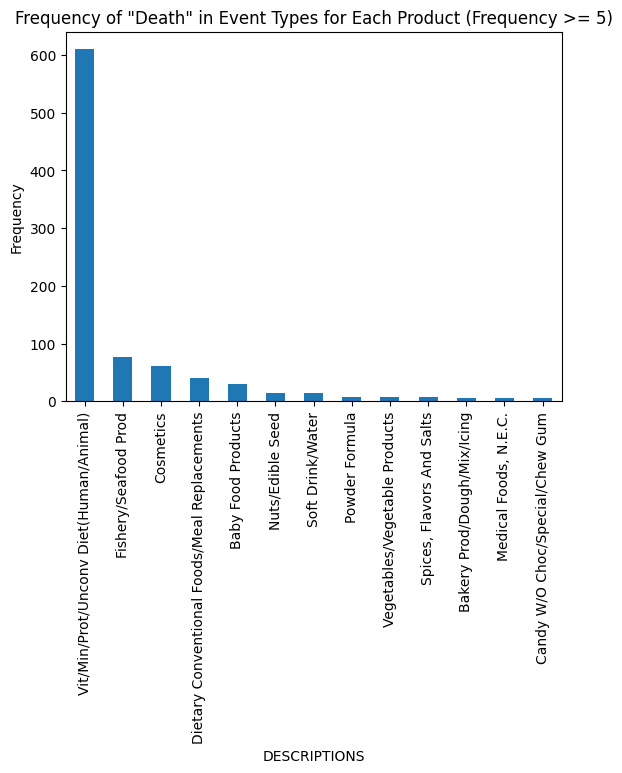

In [ ]:
#only use rows where event_type contains "death"
death_descrip_counts = death_events['DESCRIPTION'].value_counts()
filtered_products = death_descrip_counts[death_descrip_counts >= 5]

filtered_products.plot(kind='bar')
plt.xlabel('DESCRIPTIONS')
plt.ylabel('Frequency')
plt.title('Frequency of "Death" in Event Types for Each Product (Frequency >= 5)')
plt.show()

In [ ]:
des_counts = df_filtered['DESCRIPTION'].value_counts()
print(des_counts)

Vit/Min/Prot/Unconv Diet(Human/Animal)          44641
Cosmetics                                       10917
Nuts/Edible Seed                                 2777
Vegetables/Vegetable Products                    1948
Dietary Conventional Foods/Meal Replacements     1707
Fishery/Seafood Prod                             1504
Cereal Prep/Breakfast Food                       1476
Bakery Prod/Dough/Mix/Icing                      1440
Soft Drink/Water                                 1303
Baby Food Products                               1164
Fruit/Fruit Prod                                 1101
Milk/Butter/Dried Milk Prod                       814
Mult Food Dinner/Grav/Sauce/Special               788
Candy W/O Choc/Special/Chew Gum                   776
Snack Food Item                                   696
Powder Formula                                    555
Coffee/Tea                                        482
Choc/Cocoa Prod                                   450
Ice Cream Prod              

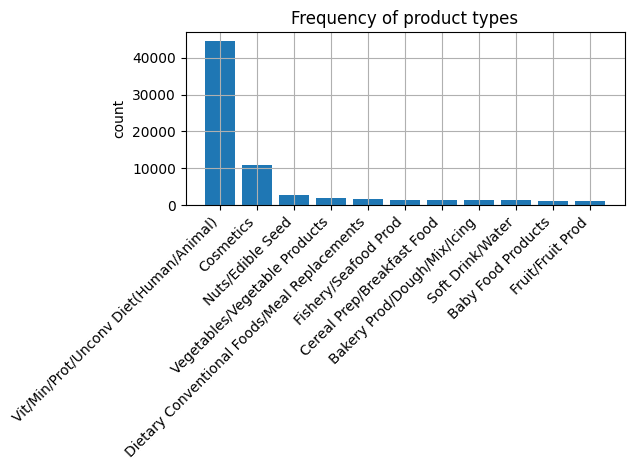

In [ ]:
des_counts = df_filtered['DESCRIPTION'].value_counts()
#only display descriptions that appear 1000+ times
filtered_counts = des_counts[des_counts > 1000]

plt.bar(filtered_counts.index, filtered_counts)

#rotate category labels for better readability
plt.xticks(rotation=45, ha='right')

plt.ylabel('count')
plt.title('Frequency of product types')
plt.grid()
plt.tight_layout()

In [ ]:
import plotly.express as px

des_counts = df_filtered['DESCRIPTION'].value_counts()
filtered_counts = des_counts[des_counts > 1000]

#same plot but with plotly
fig = px.bar(filtered_counts, x=filtered_counts.index, y=filtered_counts,
             labels={'x': 'Product Category', 'y': 'Counts'},
             title='Counts of Product Categories (count > 1000)')

#rotate category labels for better readability
fig.update_layout(xaxis=dict(tickangle=45))
fig.show()

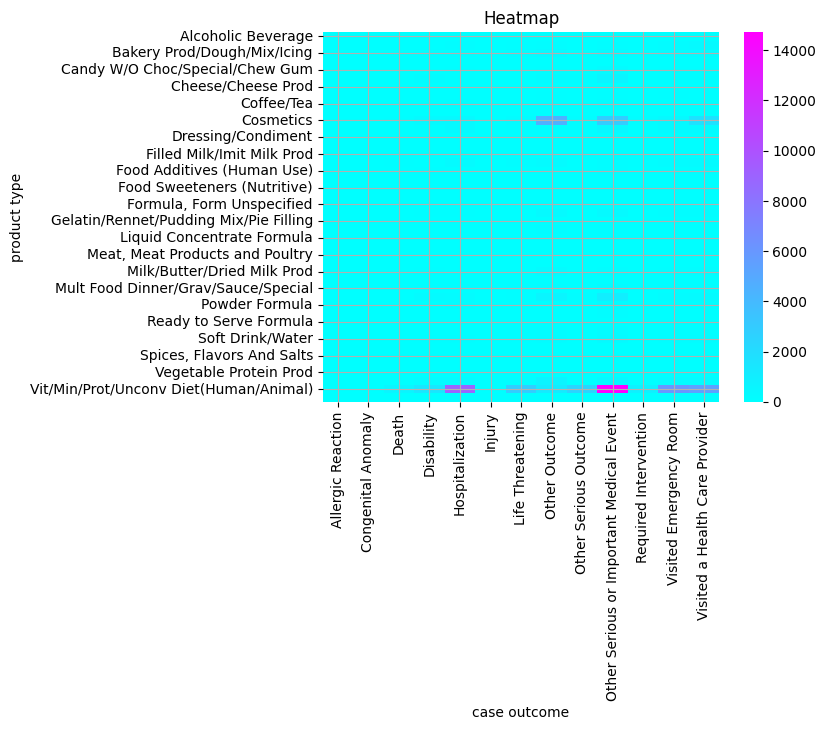

In [ ]:
import seaborn as sns

contingency_table = pd.crosstab(df_filtered['DESCRIPTION'], df_filtered['event_type'])
sns.heatmap(contingency_table, cmap="cool", fmt='d')
plt.title('Heatmap')
#plt.figure(figsize=(8, 6))
plt.xlabel("case outcome")
plt.ylabel("product type")

plt.grid()

this "spiked" heatmap depicts product-outcome combinations and their frequency.

the squares of a darker shade of blue indicate product-outcome combinations that appear in a higher frequency.

particularly, we observe that the vitamins/unconventional diet and serious medical event combination occurs with the highest frequency, followed by vitamins/uncoventional diet and hospitalization.

cosmetics and other outcomes as well as comsetics and serious medical events also occur a lot.

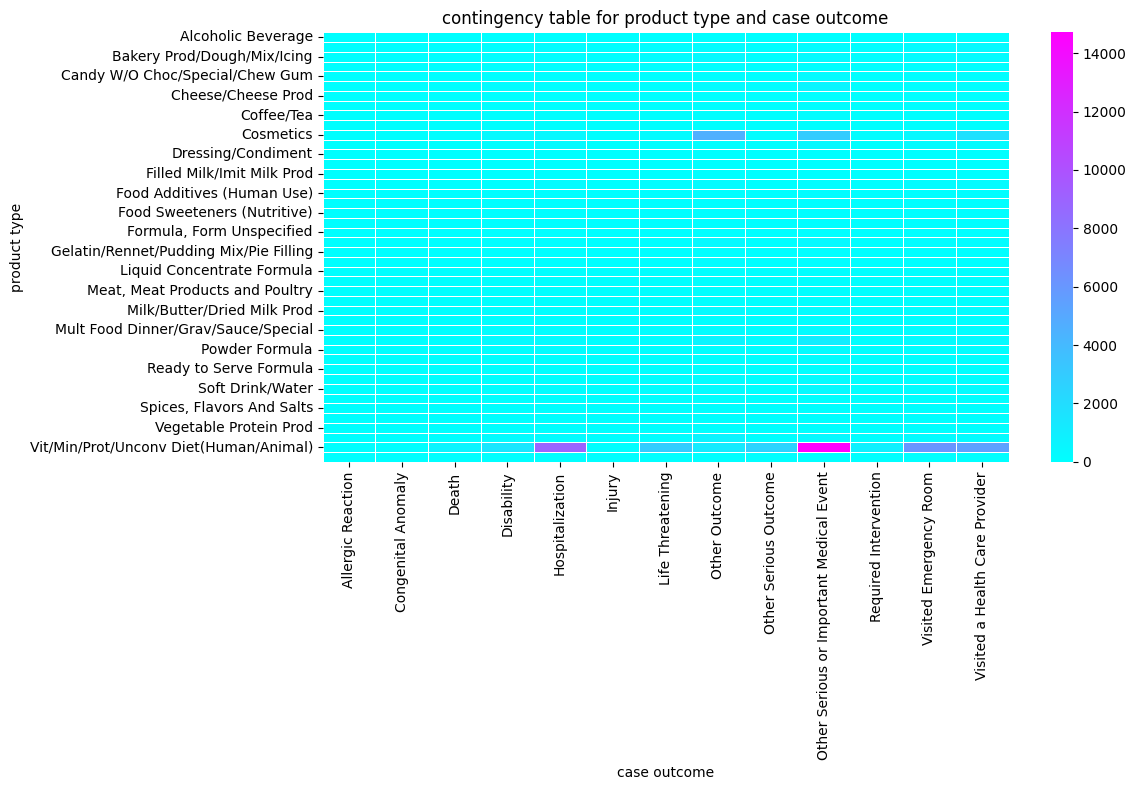

In [ ]:
#nicer looking heatmap
contingency_table = pd.crosstab(df_filtered['DESCRIPTION'], df_filtered['event_type'])

plt.figure(figsize=(12, 8))

sns.heatmap(contingency_table, cmap="cool", fmt='d', linewidths=.5)
plt.title('contingency table for product type and case outcome')
plt.xlabel("case outcome")
plt.ylabel("product type")

plt.tight_layout()
plt.show()